# Predicting Wine Quality with k-Nearest Neighbours

We use the white wine data set from https://archive.ics.uci.edu/ml/datasets/wine+quality

We will create a dependent variable related to the quality of the wine and we will try to predict that quality using the characteristics of the wine as explanatory variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the data

In [3]:
df = pd.read_csv("winequality-white.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2. Construct a new binary column “good wine” that indicates whether the wine is good (which we define as having a quality of 7 or higher)

In [4]:
quality = df["quality"].values
good_wine = []
for num in quality:
    if num>6:
        good_wine.append(1)
    else:
        good_wine.append(0)

In [5]:
good_wine = pd.DataFrame(data=good_wine, columns=["good wine"])
df['good wine'] = good_wine
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [6]:
df['good wine'].value_counts()

0    3838
1    1060
Name: good wine, dtype: int64

In [7]:
print('The proportion of good wine over the rest is of: ', 1060/4898)

The proportion of good wine over the rest is of:  0.21641486320947326


## 3. Solving imbalance of data

As we have a ratio of around 4:1 in our dependent variable, this could arise some problem in our classification algorithm. In this sense, an algorithm that classifies all the wine as "bad quality" would still have an aprroximate 80% success rate.

We will balancing our data with a **oversampling** method called **SMOTE** (Synthetic Minority Over-sampling Technique). This method generates synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

In [8]:
# divide dataset into dependent and independent variables

df_x = df.drop(['good wine', 'quality'], axis=1)
df_y = df['good wine']

In [9]:
#import imblearn
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_x, oversampled_y = sm.fit_resample(df_x, df_y)
oversampled_df = pd.concat([pd.DataFrame(oversampled_x), pd.DataFrame(oversampled_y)], axis=1)
oversampled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good wine
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,0
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,0
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,0
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,0
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7671,7.108251,0.321749,0.307426,3.217486,0.033917,29.917486,102.000000,0.991167,3.094853,0.328978,12.300000,1
7672,6.800000,0.180000,0.300000,12.800000,0.062000,19.000000,171.000000,0.998080,3.000000,0.520000,9.000000,1
7673,6.200000,0.660000,0.480000,1.200000,0.029000,29.000000,75.000000,0.989200,3.330000,0.390000,12.800000,1
7674,6.700000,0.196721,0.353279,1.411474,0.031459,43.672112,123.885258,0.989446,3.240000,0.364426,12.688526,1


In [10]:
# we can check the data now is balanced in a ratio 1:1

oversampled_df['good wine'].value_counts()

0    3838
1    3838
Name: good wine, dtype: int64

## 4. Normalise each input feature of the data according to the Z-score transform

In [11]:
# create function to calculate z-score based on mean and std of the training set
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std 

In [12]:
# call the z_score function for all the set without the "good wine" column
# we also remove the "quality" column, as is part of the output
df_standardised = z_score(oversampled_df[oversampled_df.columns[0:11]])

# add "good wine" column as before
df_standardised['good wine'] = oversampled_df[['good wine']]

In [13]:
df_standardised_x = df_standardised.drop(['good wine'], axis=1)
df_standardised_y = df_standardised['good wine']

In [14]:
# split data into train, validation and test sets (60 - 20 - 20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_standardised_x, df_standardised_y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(4605, 11)
(1536, 11)
(1535, 11)


## 5. Train the k-Nearest Neighbours classifiers for k = 1, 2, ..., 10, 20, 30, …,100, 200, 500

In [16]:
# try with k = 1

from sklearn.neighbors import KNeighborsClassifier
# train the algorithm with training set and k = 1
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

# evaluates with validation set
prediction = model.predict(X_val)
print(prediction)

# evaluate score of prediction against actual output
model.score(X_val, y_val)

[1 1 1 ... 1 1 1]


0.8846905537459283

In [17]:
# we automate for multiple k values
k_values = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]


models = []
scores = []

for i in k_values:
    
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    score = model.score(X_val, y_val)
    
    models.append('k' + str(i))
    scores.append(score)

    
print(models)
print(scores)


['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k20', 'k30', 'k40', 'k50', 'k60', 'k70', 'k80', 'k90', 'k100', 'k200', 'k300', 'k400', 'k500']
[0.8846905537459283, 0.8657980456026059, 0.8488599348534202, 0.8514657980456026, 0.8241042345276873, 0.8403908794788274, 0.8201954397394137, 0.8234527687296417, 0.8104234527687296, 0.8162866449511401, 0.793485342019544, 0.780456026058632, 0.7758957654723126, 0.7687296416938111, 0.7654723127035831, 0.7648208469055374, 0.7641693811074919, 0.7504885993485342, 0.7511400651465798, 0.7465798045602606, 0.7328990228013029, 0.7231270358306189, 0.7107491856677525]


## 6. Evaluate each classifier using the validation data set and selects the best classifier

In [18]:
knn_results = pd.DataFrame(list(zip(models, scores)), columns =['models', 'scores'])
knn_results.head()

,models,scores
0,k1,0.884691
1,k2,0.865798
2,k3,0.848860
3,k4,0.851466
4,k5,0.824104


#### Plot the error rate on the validation set

Minimum error:- 0.11530944625407166 at K = 1


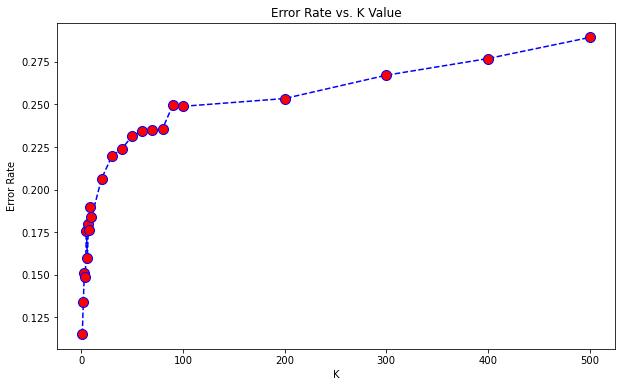

In [19]:
error_rate = []

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(k_values,error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",k_values[error_rate.index(min(error_rate))])

In our case, the minimum error (**0.115309**) on the validation set is achieved with **k = 1**

We should take into account that when k = 1 we are estimating the  probability based on a single sample, i.e., the closest neighbor. This is very sensitive to all sort of distortions like noise, outliers, mislabelling of data, and so on. By using a higher value for k, we can create a more robust model against those kind of distortions.

# 7. Predict the generalisation error using the test data set

In [20]:
## saving the k=1 model
model_k1 = KNeighborsClassifier(n_neighbors = 1)
model_k1.fit(X_train,y_train)

# evaluates with test set
prediction_k1 = model_k1.predict(X_test)

# evaluate score of prediction against actual output
score_k1 = model_k1.score(X_test, y_test)

# calculate generalisation error
print('The generalisation error on our test set with a k=1 model is: ', 1-score_k1)

The generalisation error on our test set with a k=1 model is:  0.10807291666666663


#### Plot confusion matrix

C:\Users\hernan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


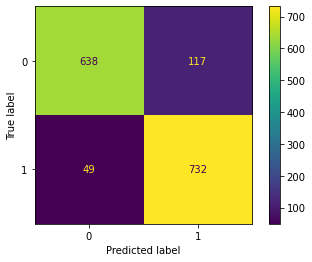

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_k1, X_test, y_test)  
plt.show()

We see that our algorithm predicts correctly around 90% of the cases, while from the confusion matrix we can assess that the mistaken levels are mostly related to false positives, i.e., wines that are classified as good quality and are not, with 117 cases.